In [2]:
import argparse
from ray.tune import Analysis
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
logdir = '.'

In [4]:

def get_succ_rate(expr_path):
    """
    The percent of cases that the control system successfully performs a mission.

    From: Safe Autononmy Metrics by Dr. Kerianne Hobbs
    """
    data = pd.read_csv(expr_path + '/progress.csv')
    if len(data.columns) > 70: # some do not have custom metrics available
        success_mean_index = [i for i, j in enumerate(data.columns)
                           if "success_mean" in j][0]
        return data.iloc[-1, success_mean_index]*100
    else:
        return float('nan')

In [5]:

def get_success_mean_col(data):
    return data['custom_metrics/outcome/success_mean']



In [6]:

def get_ep_length(expr_path):
    """
    The average time in seconds (or timesteps) required to successfully complete the
    task (an episode).

    From: Safe Autonomy Metrics by Dr. Kerianne Hobbs
    """
    data = pd.read_csv(expr_path + '/progress.csv')
    return data['episode_len_mean'].iloc[-1]


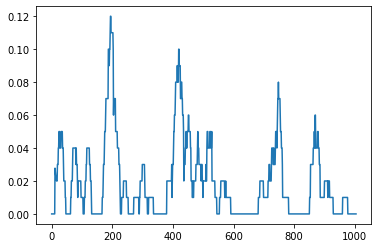

In [7]:

    #args = get_args()
    #success_rate = get_succ_rate(args.logdir)

    data = pd.read_csv(logdir + '/progress.csv')

    success_mean_data = get_success_mean_col(data)
    plt.figure()
    plt.plot(success_mean_data)

In [8]:
data

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,agent_timesteps_total,done,episodes_total,...,perf/ram_util_percent,info/learner/default_policy/learner_stats/cur_kl_coeff,info/learner/default_policy/learner_stats/cur_lr,info/learner/default_policy/learner_stats/total_loss,info/learner/default_policy/learner_stats/policy_loss,info/learner/default_policy/learner_stats/vf_loss,info/learner/default_policy/learner_stats/vf_explained_var,info/learner/default_policy/learner_stats/kl,info/learner/default_policy/learner_stats/entropy,info/learner/default_policy/learner_stats/entropy_coeff
0,-37.075173,-112.144283,-71.579196,2001.0,6,6,12006,12006,False,6,...,56.693333,0.200000,0.00005,2.544353,-0.014949,2.556739,0.493963,0.012818,4.782746,0.0
1,-16.856425,-112.144283,-51.606656,2001.0,6,6,24012,24012,False,12,...,56.900000,0.200000,0.00005,0.593420,-0.018235,0.608407,0.500809,0.016235,4.768411,0.0
2,-14.884589,-112.144283,-42.190077,2001.0,6,6,36018,36018,False,18,...,56.942857,0.200000,0.00005,0.353049,-0.013970,0.364193,0.639365,0.014134,4.766318,0.0
3,-14.884589,-112.144283,-36.439774,2001.0,6,6,48024,48024,False,24,...,56.742857,0.200000,0.00005,0.418138,-0.012980,0.428431,0.260978,0.013429,4.762660,0.0
4,-14.884589,-112.144283,-32.705503,2001.0,6,6,60030,60030,False,30,...,56.835714,0.200000,0.00005,0.425477,-0.011494,0.434474,0.193708,0.012485,4.757384,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,-6.035473,-8.031609,-6.864076,2001.0,6,6,11877179,11877179,False,6006,...,64.818750,0.072163,0.00005,0.299714,-0.007099,0.306109,0.446187,0.009756,0.827838,0.0
1001,-6.035473,-8.075859,-6.854309,2001.0,6,6,11889185,11889185,False,6012,...,64.793333,0.072163,0.00005,0.254009,-0.004438,0.257935,0.506261,0.007097,0.678610,0.0
1002,-6.035473,-8.075859,-6.831726,2001.0,6,6,11901191,11901191,False,6018,...,64.887500,0.072163,0.00005,0.329980,-0.005046,0.334573,0.393120,0.006279,0.746592,0.0
1003,-6.035473,-8.075859,-6.816415,2001.0,6,6,11913197,11913197,False,6024,...,64.900000,0.072163,0.00005,0.312841,-0.005309,0.317418,0.416511,0.010152,0.871455,0.0


In [9]:
data.columns

Index(['episode_reward_max', 'episode_reward_min', 'episode_reward_mean',
       'episode_len_mean', 'episodes_this_iter', 'num_healthy_workers',
       'timesteps_total', 'agent_timesteps_total', 'done', 'episodes_total',
       'training_iteration', 'experiment_id', 'date', 'timestamp',
       'time_this_iter_s', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id',
       'custom_metrics/outcome/success_mean',
       'custom_metrics/outcome/success_min',
       'custom_metrics/outcome/success_max',
       'custom_metrics/outcome/failure_mean',
       'custom_metrics/outcome/failure_min',
       'custom_metrics/outcome/failure_max',
       'custom_metrics/failure_code_ratio/timeout_mean',
       'custom_metrics/failure_code_ratio/timeout_min',
       'custom_metrics/failure_code_ratio/timeout_max',
       'custom_metrics/failure_code_ratio/distance_mean',
       'custom_metrics/failure_code

In [10]:
data['custom_metrics/outcome/success_mean']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1000    0.0
1001    0.0
1002    0.0
1003    0.0
1004    0.0
Name: custom_metrics/outcome/success_mean, Length: 1005, dtype: float64

In [11]:
data.shape

(1005, 85)

(1005, 85)